In [7]:
Analysis:

Urban areas had the highest number of drivers by far, followed by suburban and then rural, with the least number of drivers per city.

Urban cities have the highest percentage of total fares at 62.97%, followed by Suburban with 30.5%, and then rural with the remaining percentage of 6.8%.

It makes sense that the more people in a given location, the more rides were given. Cities hat a total of almost 70% of the market share.

The best growth opportunities are in the city.

In [ ]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [8]:
# Read the City and Ride Data
city_data_df=pd.read_csv("data/city_data.csv")
ride_data_df=pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_pyber=pd.merge(city_data_df,ride_data_df, on="city")

# Display the data table for preview
combined_pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


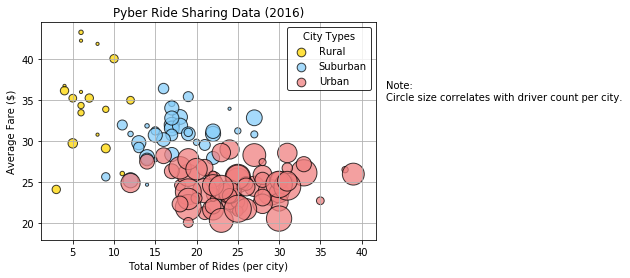

In [9]:
#group be city name
by_city = combined_pyber.groupby('city')

#Average Fare Per City
avg_fare = by_city.mean()['fare']

#Number of Rides Per City
ride_count = by_city['ride_id'].count()

#Number of Drivers Per City
driver_count = by_city.mean()['driver_count']

#City Type
city_type = city_data_df.set_index('city')['type']

#Build DataFrame
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

#City Types
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Plotting City Types
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = 'gold', edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = 'lightskyblue', edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = 'lightcoral', edgecolor = 'black', label = 'Urban', alpha = .75)

#Print Labels
#https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.text(43, 35,'Note:\nCircle size correlates with driver count per city.')

#Build Legend
#https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
legend = plt.legend(frameon = True, edgecolor = 'black', title='City Types')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

#Show Chart
plt.grid()
plt.show()

In [35]:
#City Fares Sum
city_fare_pie = combined_pyber.groupby(["type"])["fare"].sum()
city_fare_pie

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [36]:
#Wedge Labels
city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

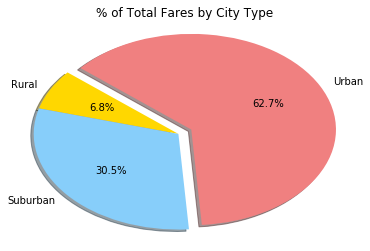

In [43]:
#Pie Chart Colors
colors = ["gold", "lightskyblue", "lightcoral"]

#Seperate Section
explode = (0,0, 0.1)

#Build Pie Chart
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, startangle=140, shadow = True)

#Set Axis
plt.axis("tight")

# Title
plt.title('% of Total Fares by City Type')

#Show the chart
plt.show()

In [11]:
#Total Rides by City Type
city_rides_pie = combined_pyber.groupby(["type"])["ride_id"].count()
city_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [29]:
#Wedge Labels
city_rides_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

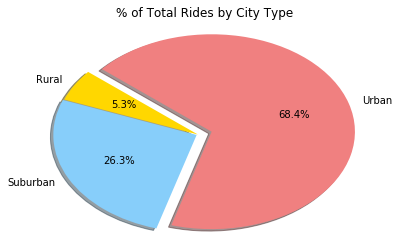

In [34]:
#Pie Chart Colors
colors = ["gold", "lightskyblue", "lightcoral"]

#Seperate Section
explode = (0,.01,.1)

#Build Pie Chart
plt.pie(city_rides_pie, labels = city_rides_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, startangle=140, shadow = True)

#Set Axis
plt.axis("tight")

# Title
plt.title('% of Total Rides by City Type')

#Show the chart
plt.show()

# Show Figure
plt.show()

In [51]:
#Total driver count.
city_drivers_pie = city_data_df.groupby(["type"])["driver_count"].sum()
city_drivers_pie

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [52]:
#Use the City Pie index for the wedge labels.
city_drivers_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

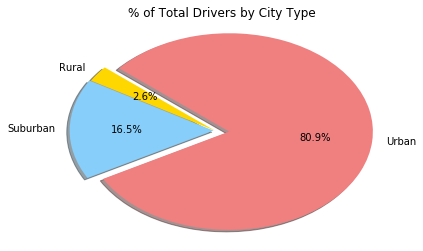

In [57]:
#Pie Chart Colors
colors = ["gold", "lightskyblue", "lightcoral"]

#Seperate Section
explode = (0,.01,.1)

#Build Pie Chart
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode, startangle=140, shadow = True)

#Set Axis
plt.axis("tight")

# Title
plt.title('% of Total Drivers by City Type')

#Show the chart
plt.show()